# **CS4742 - Bioinformatics**

## Assignment - Phylogenetic Trees

IMPORTING Required Dependencies 

In [1]:
import os
import pandas as pd
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio import AlignIO
from Bio import Phylo
from Bio import Seq
from Bio.Align.Applications import ClustalOmegaCommandline
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
import dendropy
import json
import matplotlib
import matplotlib.pyplot as plt
from io import StringIO

**Protein Set Assigned to the Group**


*   Alpha/beta hydrolase
*   LysR family transcriptional regulator
*   Helix-turn-helix domain-containing protein
*   Efflux transporter outer membrane subunit


In [2]:
proteins = ["alpha/beta hydrolase", "LysR family transcriptional regulator", "helix-turn-helix domain-containing protein", "efflux transporter outer membrane subunit"]

In [3]:
proteins

['alpha/beta hydrolase',
 'LysR family transcriptional regulator',
 'helix-turn-helix domain-containing protein',
 'efflux transporter outer membrane subunit']

Reading protein_tables.xlsx from disk

In [4]:
protein_tables = pd.ExcelFile('protein_tables.xlsx')

In [5]:
count = 0
for bacterial_species in protein_tables.sheet_names:
    count +=1
    bacterial_species_tabel = protein_tables.parse(bacterial_species)

print ("Number of bacterial species in the file")    
print (count)

Number of bacterial species in the file
21


In [6]:
bacterial_species_tabel

,#Replicon Name,Replicon Accession,Start,Stop,Strand,GeneID,Locus,Locus tag,Protein product,Length,Protein name
0,Unknown,NZ_AP014881.1,118,597,-,-,-,APT_RS00005,WP_003623258.1,159,YaiI/YqxD family protein
1,Unknown,NZ_AP014881.1,837,1364,+,-,-,APT_RS00010,WP_003623257.1,175,periplasmic heavy metal sensor
2,Unknown,NZ_AP014881.1,1501,2748,+,-,-,APT_RS00015,WP_035362129.1,415,multidrug effflux MFS transporter
3,Unknown,NZ_AP014881.1,2773,3159,-,-,-,APT_RS00020,WP_003623254.1,128,hypothetical protein
4,Unknown,NZ_AP014881.1,3190,3375,-,-,-,APT_RS00025,WP_003623252.1,61,MULTISPECIES: Trm112 family protein
...,...,...,...,...,...,...,...,...,...,...,...
2737,plasmid3,NZ_AP014884.1,1281,2297,-,-,-,APT_RS14320,WP_003627465.1,338,MULTISPECIES: MobA/MobL family protein
2738,plasmid3,NZ_AP014884.1,2462,2749,+,-,-,APT_RS14325,WP_003627463.1,95,MULTISPECIES: hypothetical protein
2739,plasmid3,NZ_AP014884.1,2746,453,+,-,-,APT_RS14310,WP_003627461.1,168,MULTISPECIES: hypothetical protein
2740,plasmid4,NZ_AP014885.1,1112,1330,+,-,-,APT_RS14335,WP_003627518.1,72,hypothetical protein


In [7]:
bacterial_species_tabel['Protein name']

0                     YaiI/YqxD family protein
1               periplasmic heavy metal sensor
2            multidrug effflux MFS transporter
3                         hypothetical protein
4          MULTISPECIES: Trm112 family protein
                         ...                  
2737    MULTISPECIES: MobA/MobL family protein
2738        MULTISPECIES: hypothetical protein
2739        MULTISPECIES: hypothetical protein
2740                      hypothetical protein
2741            replication initiation protein
Name: Protein name, Length: 2742, dtype: object

In [8]:
"YaiI/YqxD family protein" in bacterial_species_tabel['Protein name']

False

In [9]:
found = bacterial_species_tabel[bacterial_species_tabel['Protein name'] == "MULTISPECIES: hypothetical protein"]
print(found.count().loc["Protein name"])

87


Define Custom Print Method

In [10]:
def printSpecialText(text):
  print ("========================================| "+ text + " |========================================")

In [11]:
def getSimplifiedProteinName(name):
  return name.replace(" ","_").replace("/","-")

In [12]:
def plotTree(tree, output):
    matplotlib.rc('font', size=12)
    figure = plt.figure(figsize=(20, 30), dpi=300)
    axes = figure.add_subplot(1, 1, 1)
    Phylo.draw(tree, axes=axes, do_show=False)
    plt.savefig(output, dpi=300)
    plt.show()

# INTRO
Out of the above 21 bacterial species, nd which ones have all the proteins in ***protein_set***
present in their genomes. Let’s call this set of bacteria the ***common_bactiria_set***. You
can use the Excel le called the "Supporting_Documents\protein_tables.xlsx", which is
given to you, to find this ***common_bactiria_set***. Each sheet in this excel le represents
one of the bacterial species belonging to the Acetobacteraceae family mentioned above
and lists the proteins present in them. The sheet name is the accession ID of the species.
The protein names are given in the column "Protein name".

**STEP 1** : Get Common Bactiria Set

In [13]:
# QUESTION 1
common_bacteria_set = []

for bacterial_species in protein_tables.sheet_names:    
    bacterial_species_tabel = protein_tables.parse(bacterial_species)
    isTrue = True
    
    printSpecialText(bacterial_species)

    for protein in proteins:
        protein_tabel = bacterial_species_tabel.loc[bacterial_species_tabel['Protein name'] == protein]
        if protein_tabel.shape[0] == 0:
            isTrue = False
            break
            
    if isTrue == True:
        common_bacteria_set.append(bacterial_species)
        

========================================| NZ_CP014692.1  |========================================
========================================| NZ_CP023657.1 |========================================
========================================| NZ_CP022699.1 |========================================
========================================| NZ_CP014687.1 |========================================
========================================| NZ_LN606600.1 |========================================
========================================| NZ_CP011120.1 |========================================
========================================| NZ_CP015164.1 |========================================
========================================| NZ_CP015168.1 |========================================
========================================| NZ_CP021524.1 |========================================
========================================| NZ_CP022374.1 |========================================
===================

In [14]:
len(common_bacteria_set)

19

**STEP 2 :** Download the gene sequence in common_bacteria_set

Done

**STEP 3 :** Extract gene sequence for each protein in protein_set and for each species in common_bacteria_set


In [15]:
print (proteins)

['alpha/beta hydrolase', 'LysR family transcriptional regulator', 'helix-turn-helix domain-containing protein', 'efflux transporter outer membrane subunit']


In [16]:
for protein in proteins:
    proteinGenomes = []
    for bacterial_species in common_bacteria_set:    
        bacterial_species_tabel = protein_tables.parse(bacterial_species)

        printSpecialText(bacterial_species)

        protein_data = bacterial_species_tabel.loc[bacterial_species_tabel['Protein name'] == protein]
        
        first_index = protein_data.first_valid_index()
        start, end = protein_data.loc[first_index]['Start'], protein_data.loc[first_index]['Stop']
      
        try :
            fasta_sequences = SeqIO.parse(open("./gnomes/"+bacterial_species.strip()+".fasta"),'fasta')
            for fasta in fasta_sequences:
                name, sequence = fasta.id, fasta.seq
                unalignedSequence = sequence[start:end+1]
                proteinGenomes.append(SeqRecord(unalignedSequence, bacterial_species, getSimplifiedProteinName(protein), ""))

        except FileNotFoundError:

            printSpecialText(" FILE NOT FOUND ")
    
    printSpecialText("===")
    printSpecialText(protein + "Added")
    printSpecialText("===")
    
    SeqIO.write(proteinGenomes, "runtime/gene_sequences/{}.fasta".format(getSimplifiedProteinName(protein)), "fasta")

========================================| NZ_CP014692.1  |========================================
========================================| NZ_CP023657.1 |========================================
========================================| NZ_CP022699.1 |========================================
========================================| NZ_CP014687.1 |========================================
========================================| NZ_LN606600.1 |========================================
========================================| NZ_CP011120.1 |========================================
========================================| NZ_CP015164.1 |========================================
========================================| NZ_CP015168.1 |========================================
========================================| NZ_CP021524.1 |========================================
========================================| NZ_AP018515.1 |========================================
===================

========================================| NC_017108.1 |========================================
========================================| NZ_AP014881.1 |========================================
========================================| === |========================================
========================================| efflux transporter outer membrane subunitAdded |========================================
========================================| === |========================================


**STEP 4 :** Building phylogenetic trees


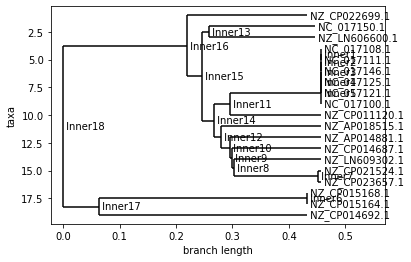

========================================| alpha-beta_hydrolase.fasta |========================================


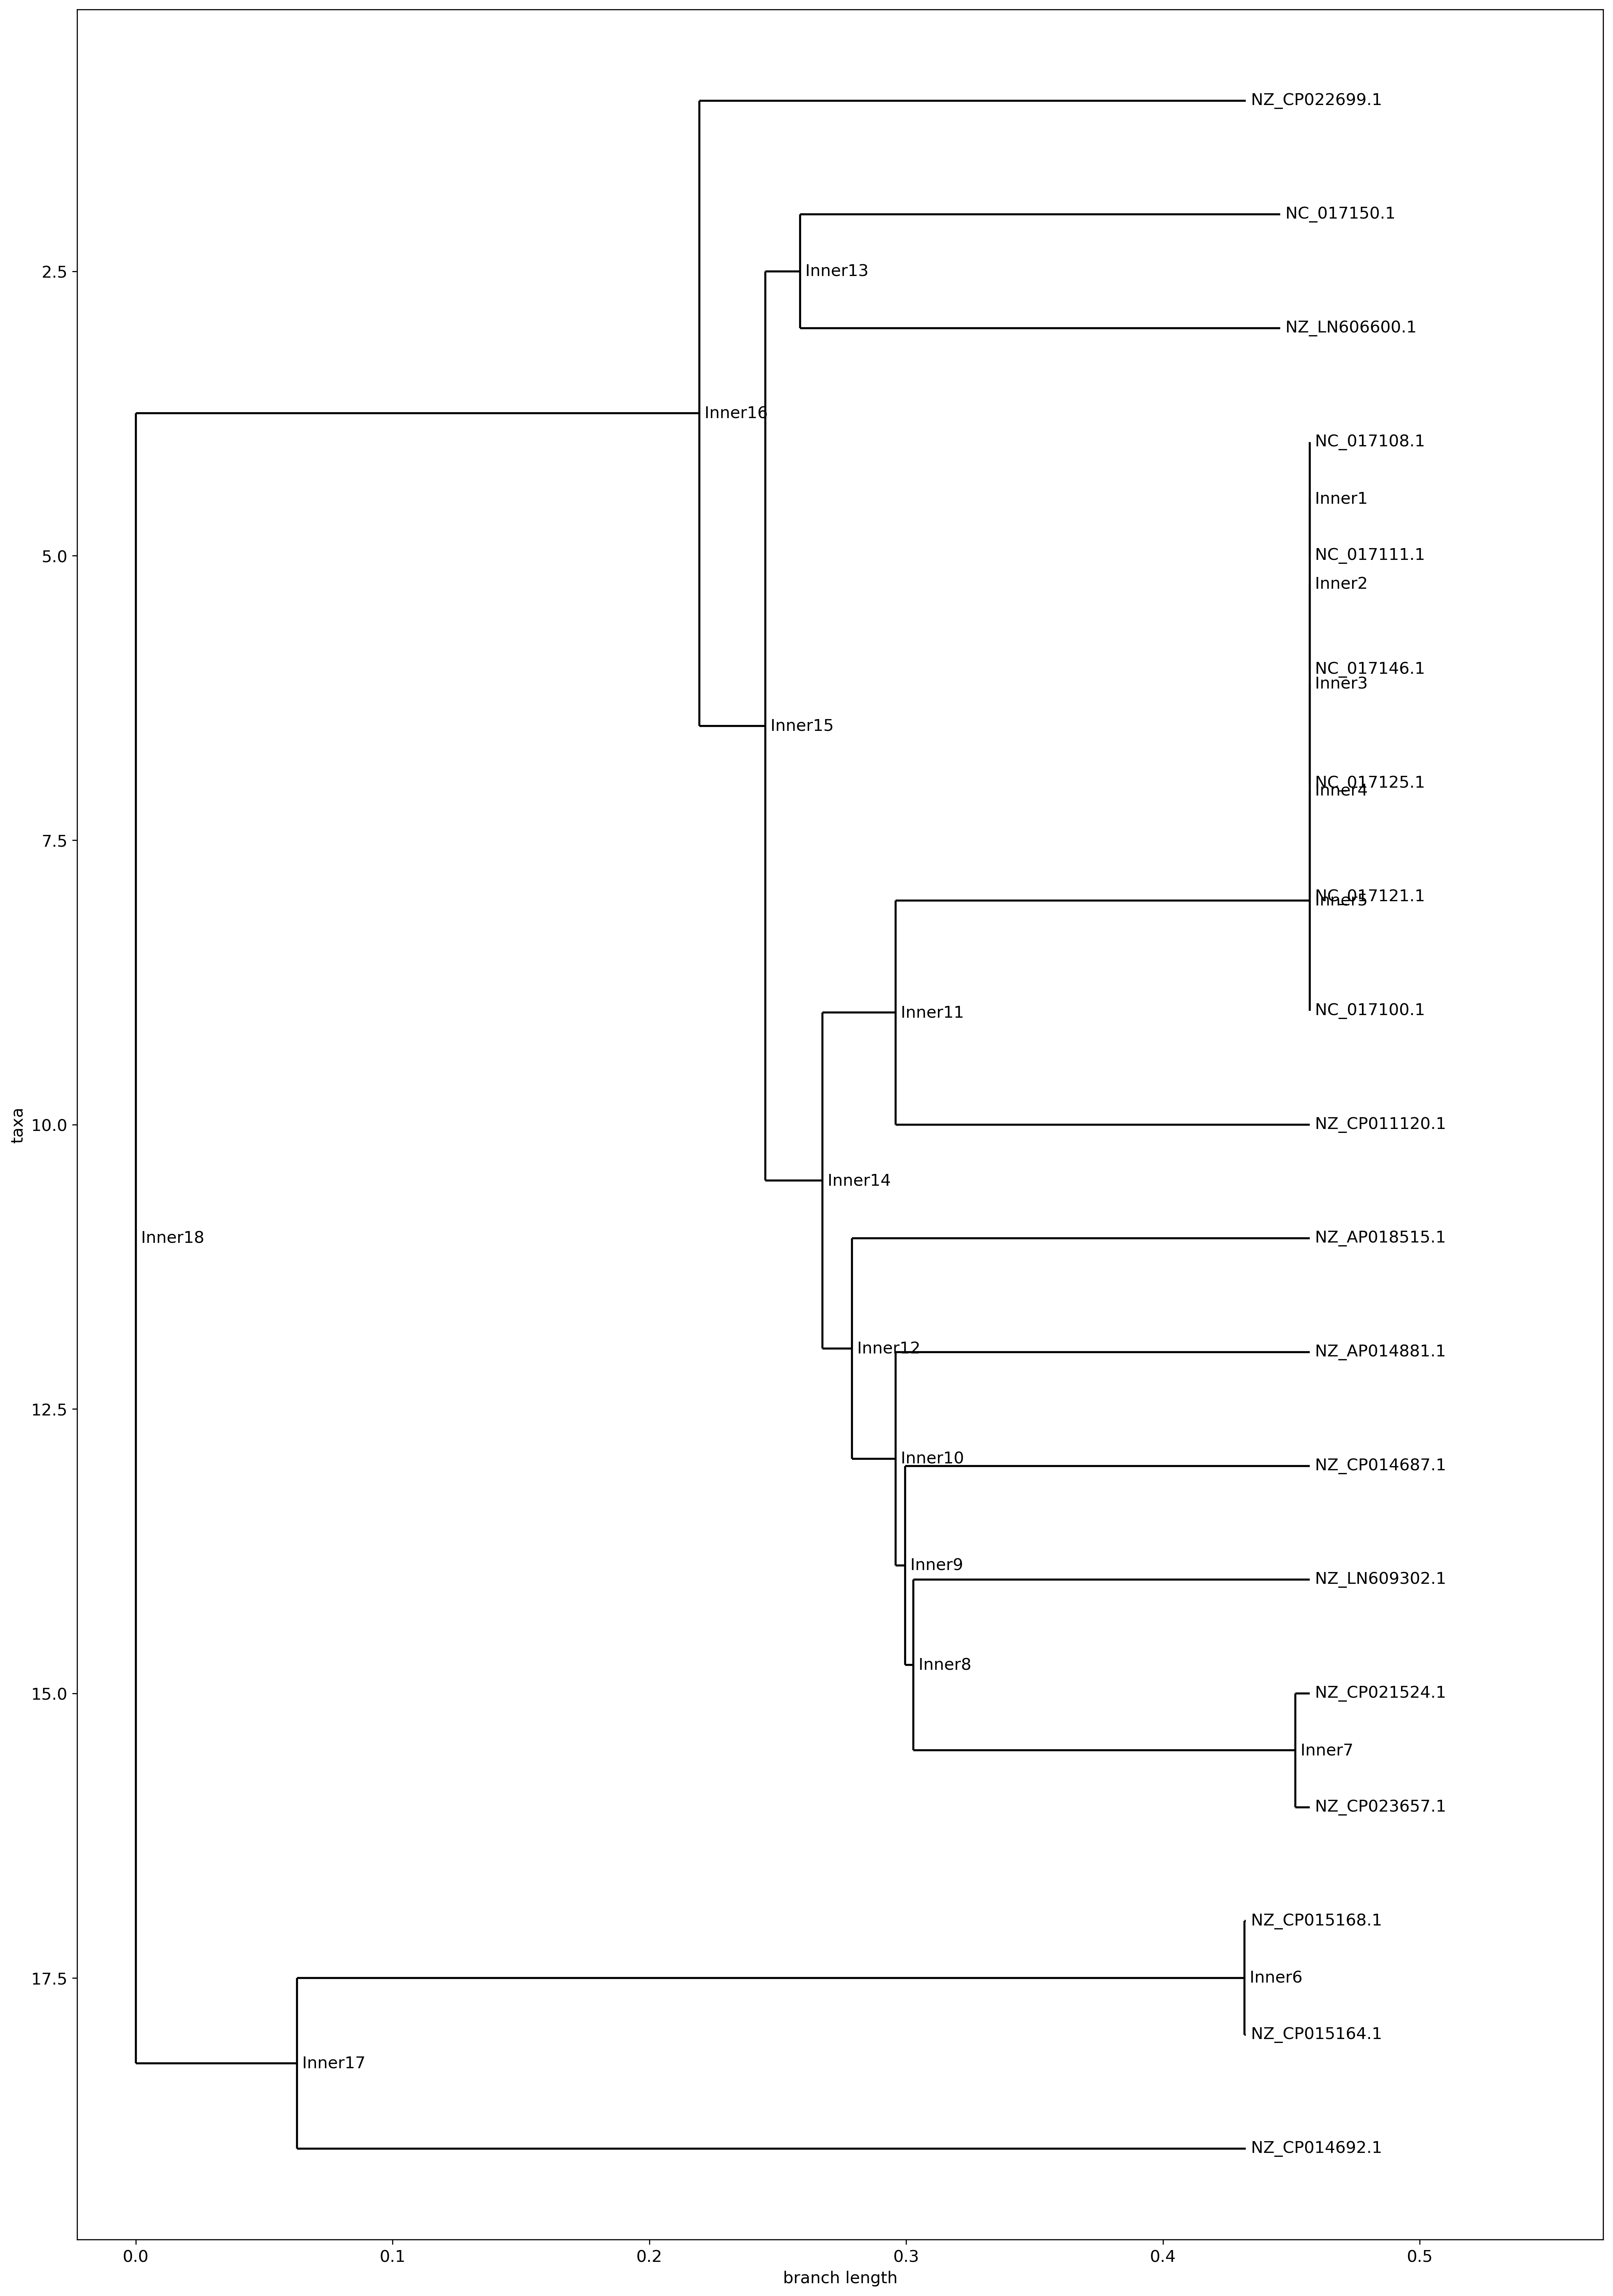

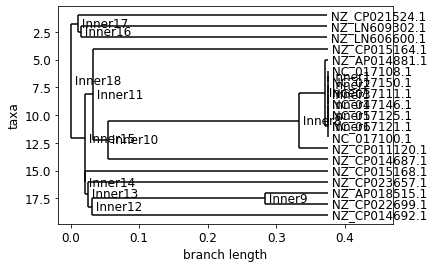

========================================| efflux_transporter_outer_membrane_subunit.fasta |========================================


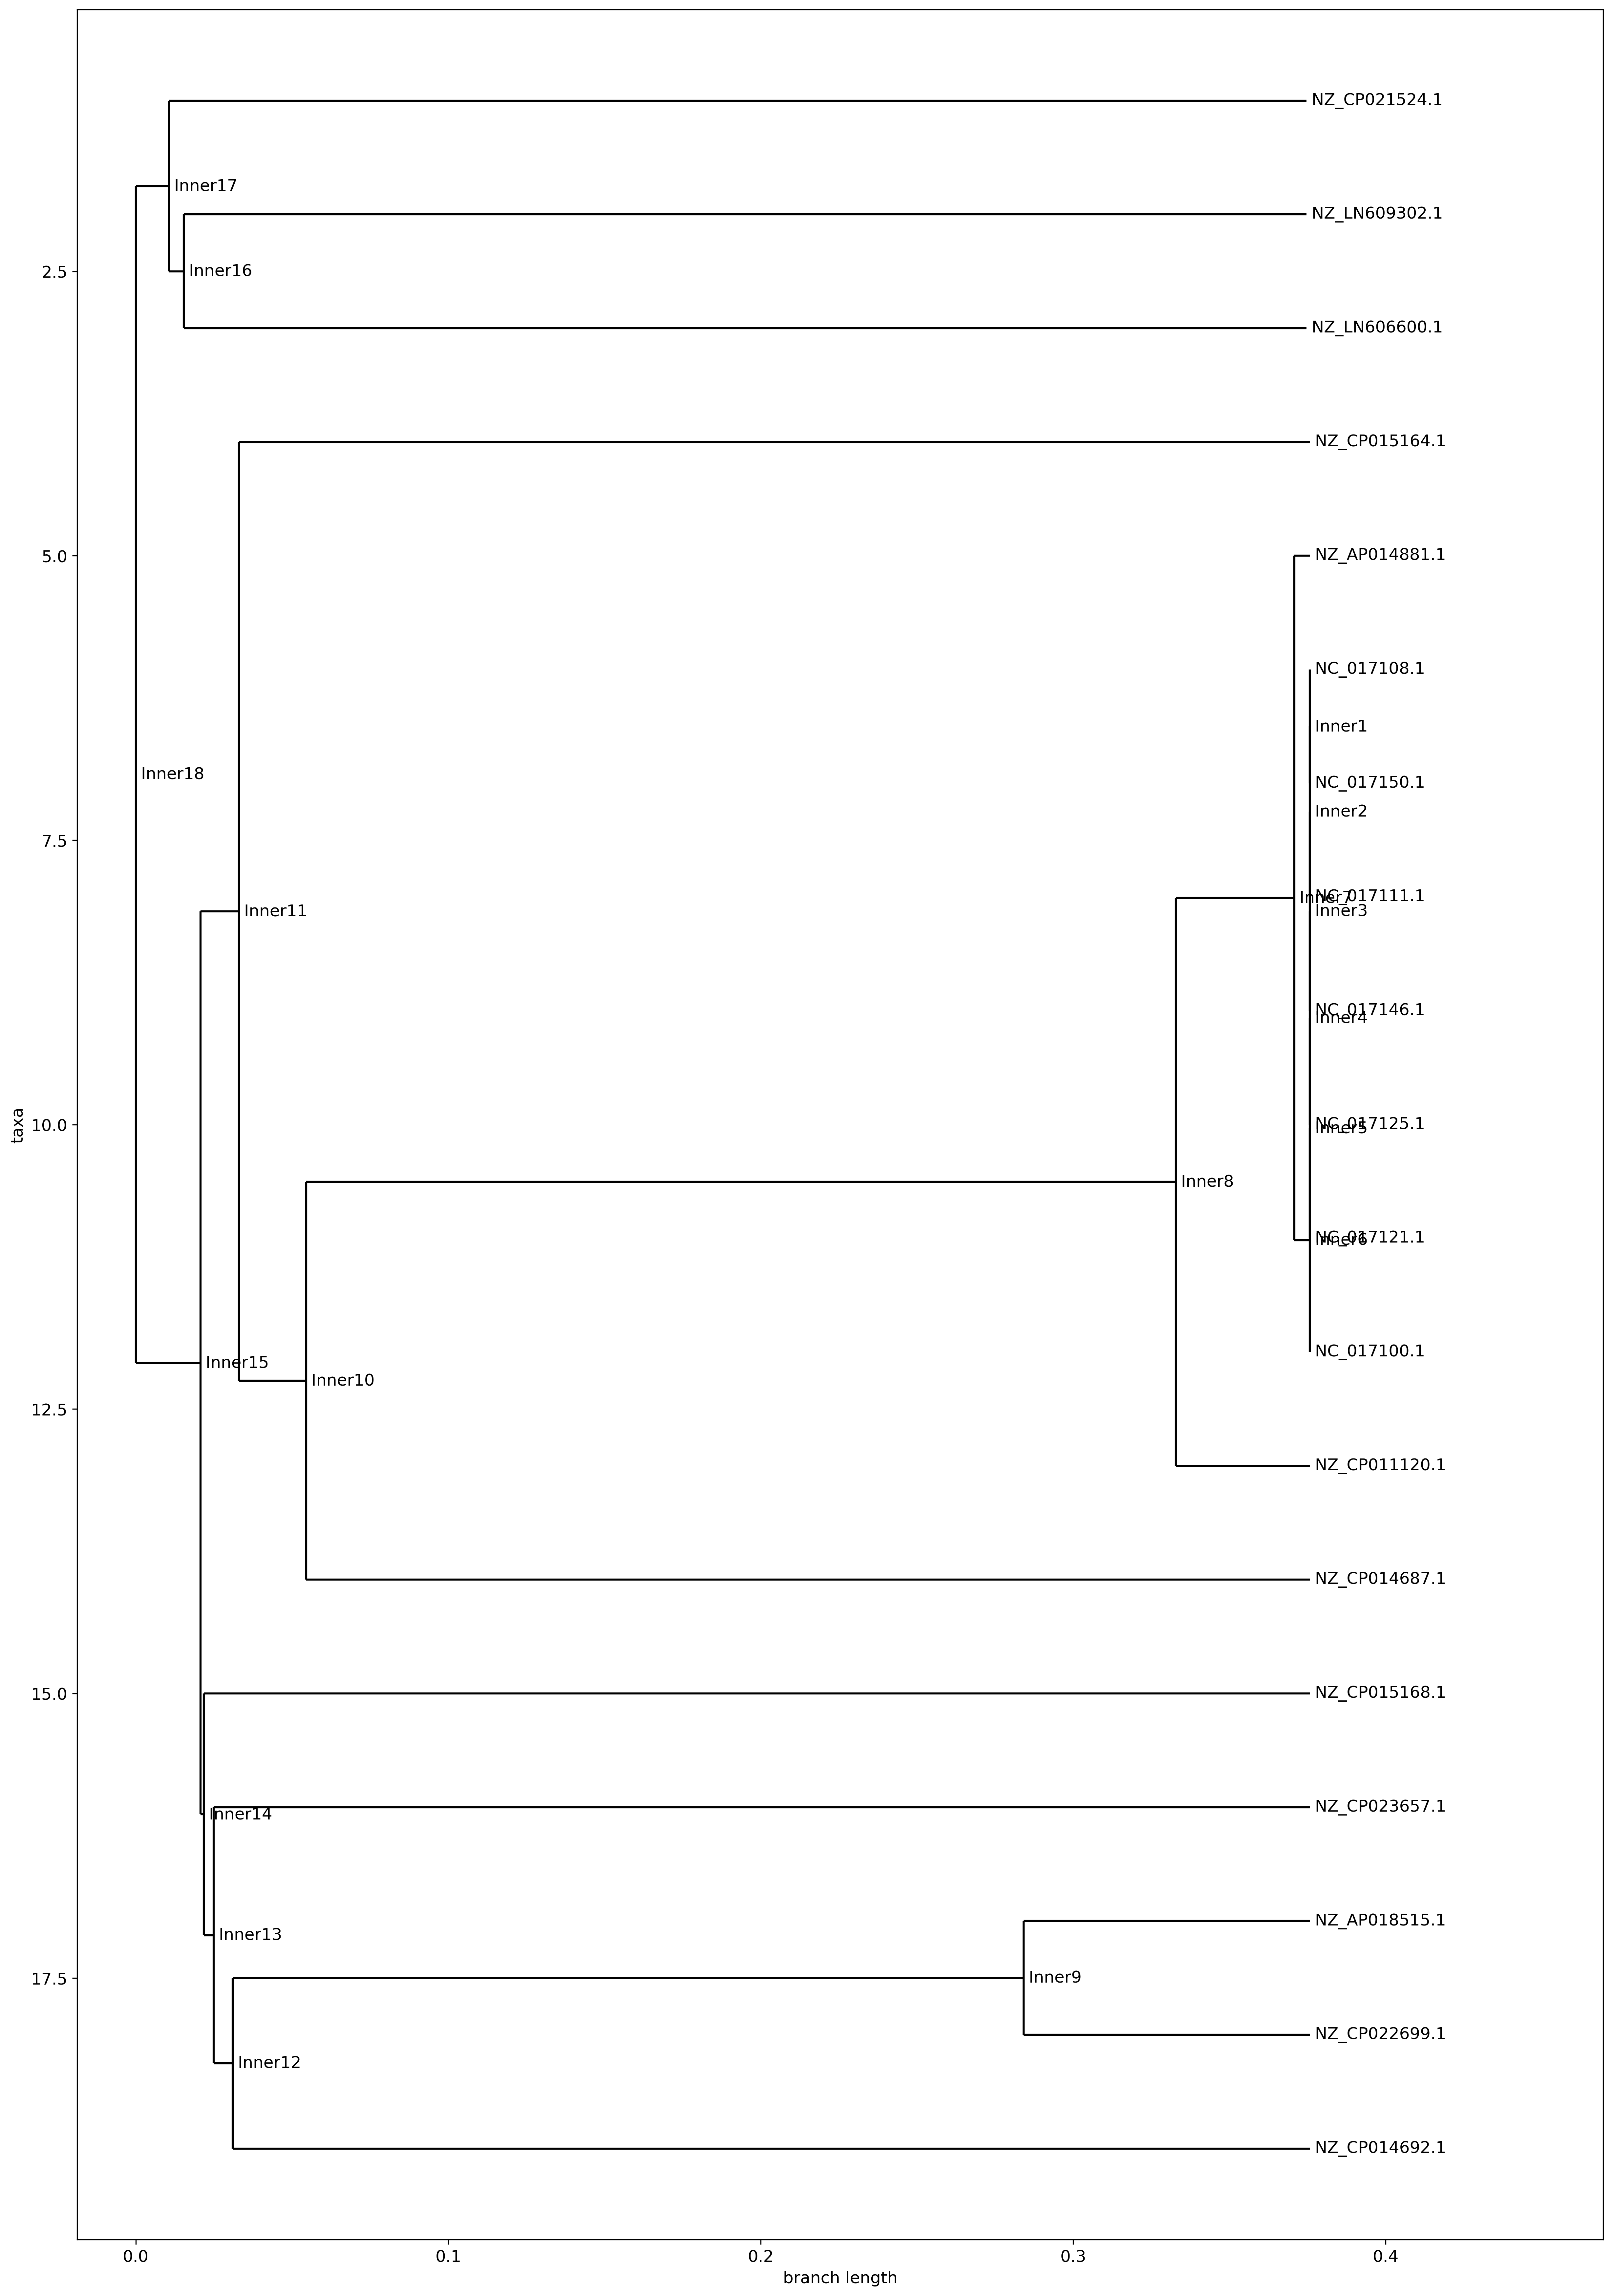

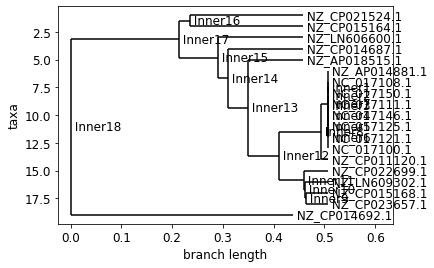

========================================| helix-turn-helix_domain-containing_protein.fasta |========================================


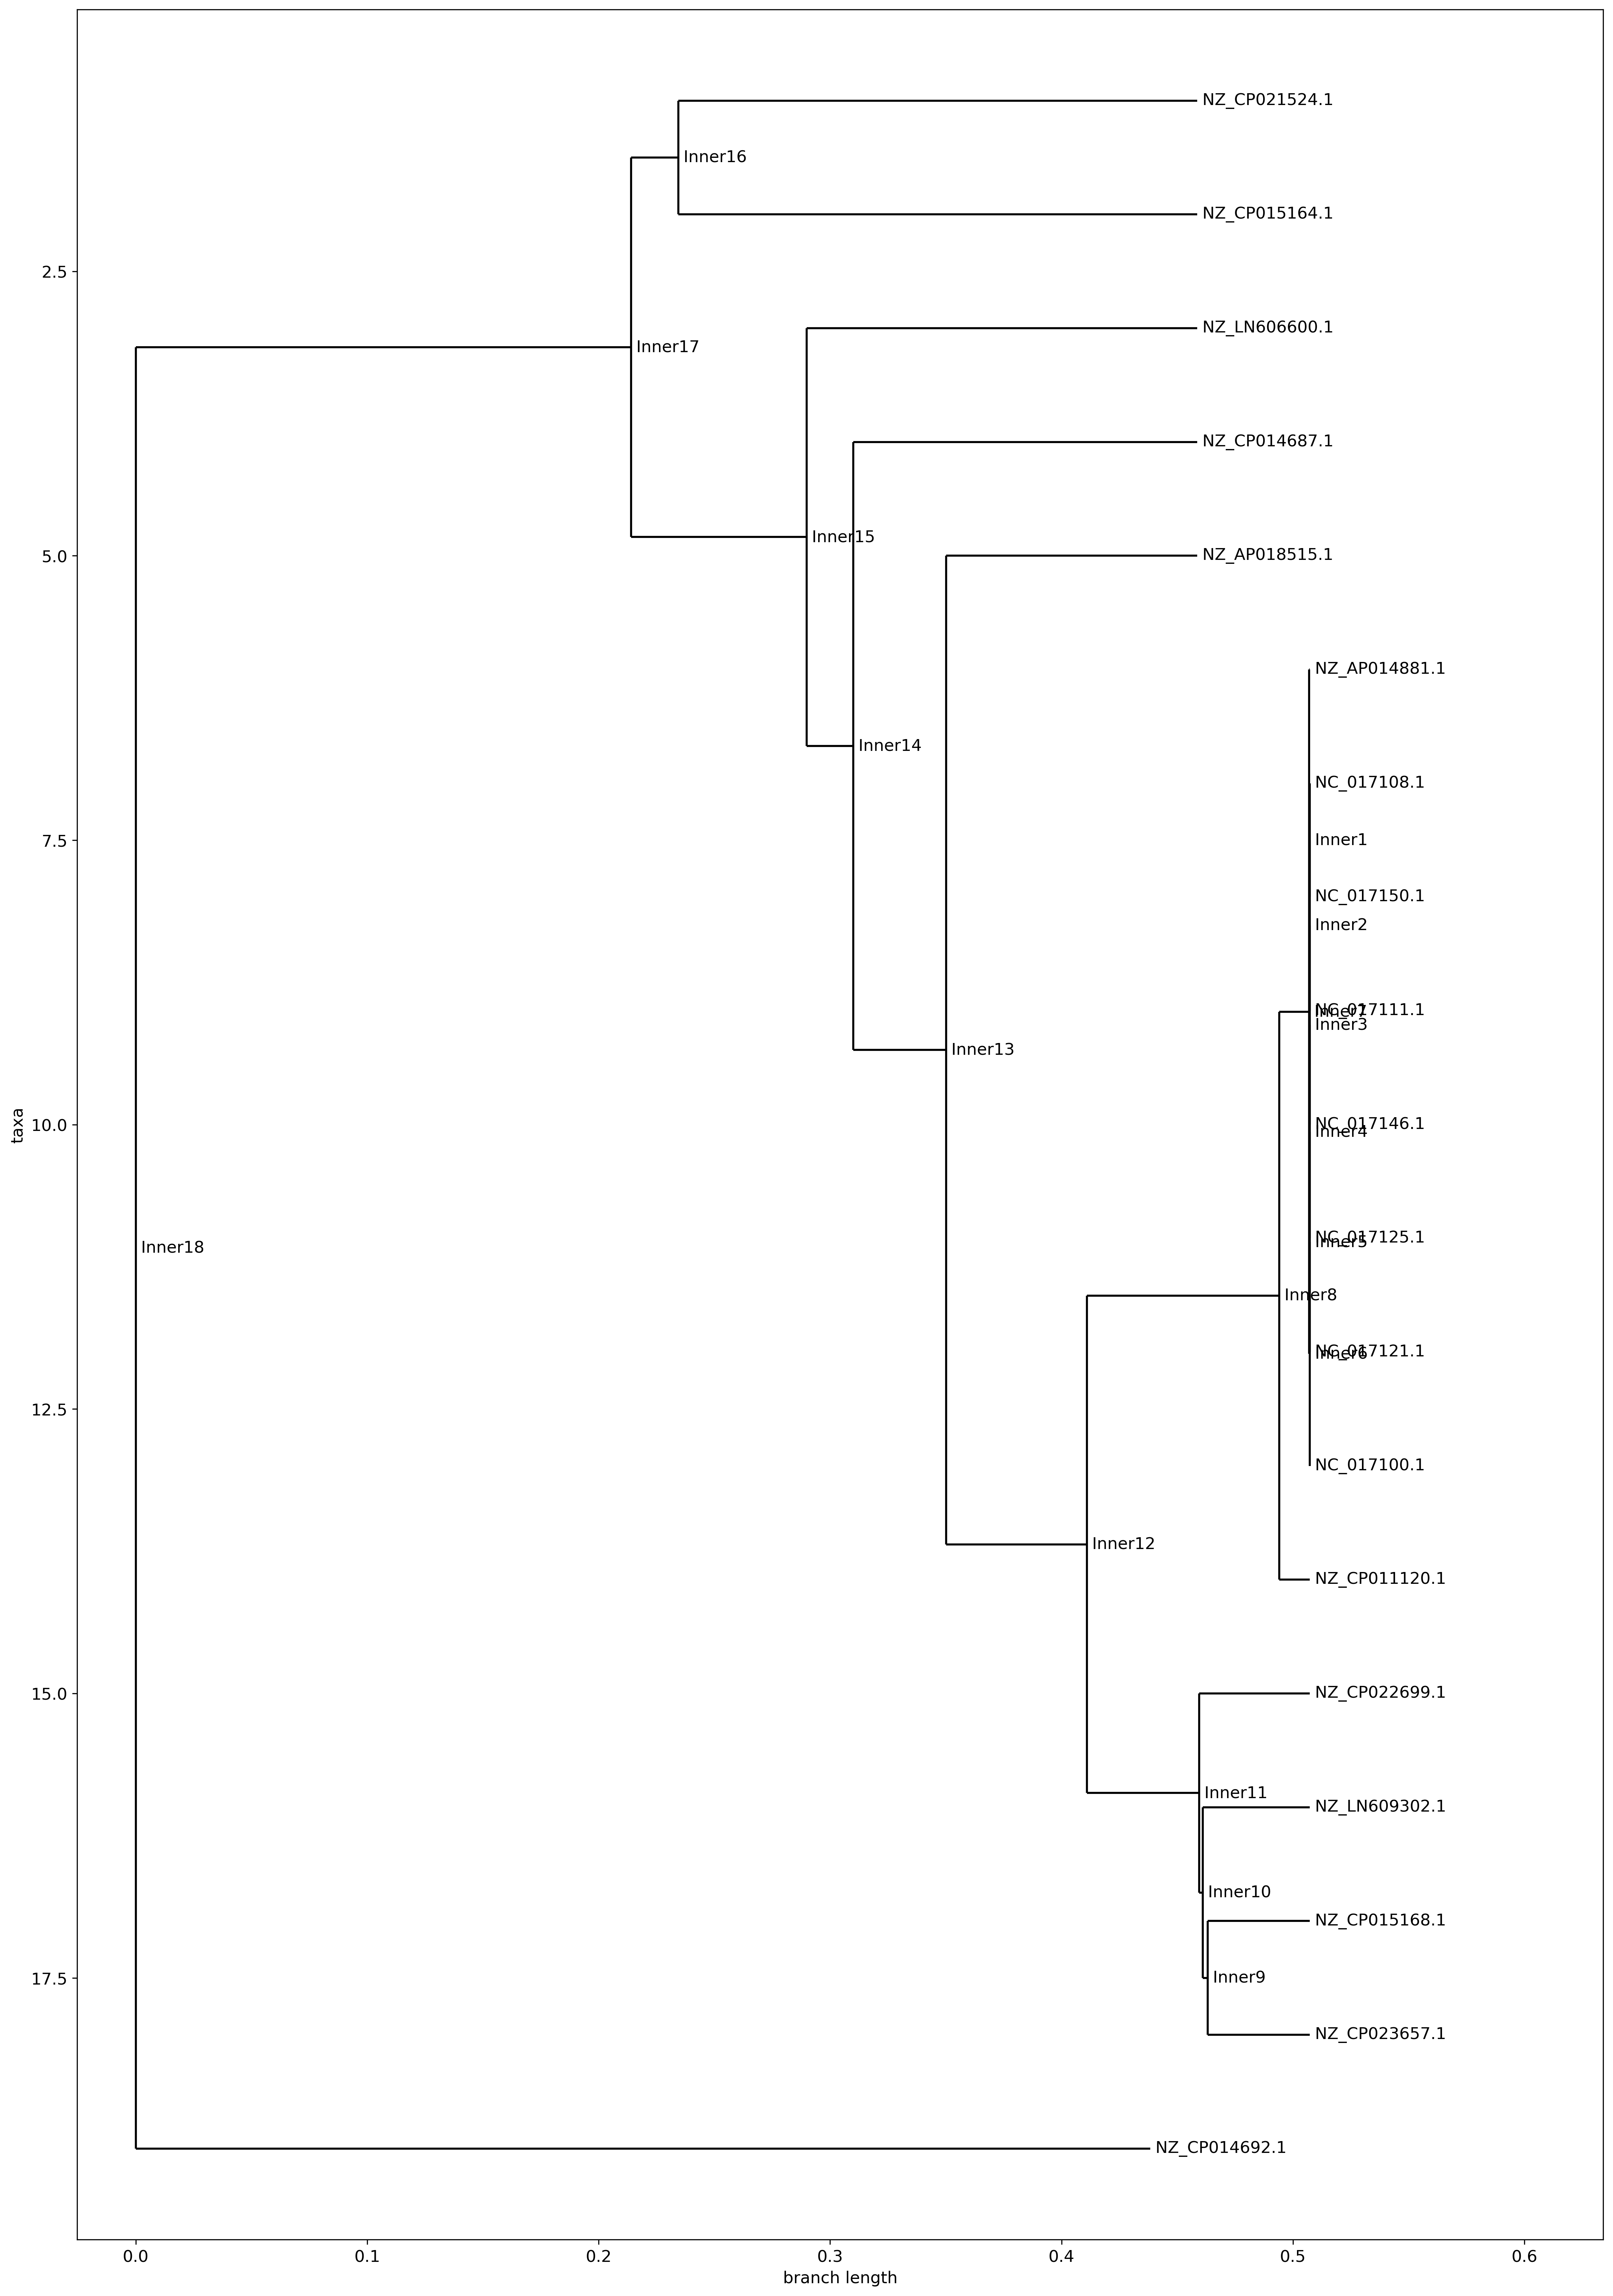

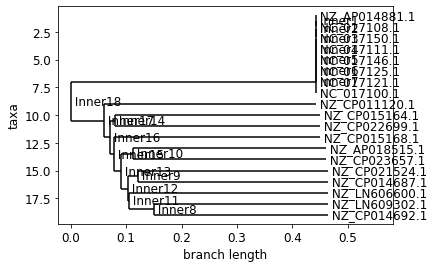

========================================| LysR_family_transcriptional_regulator.fasta |========================================


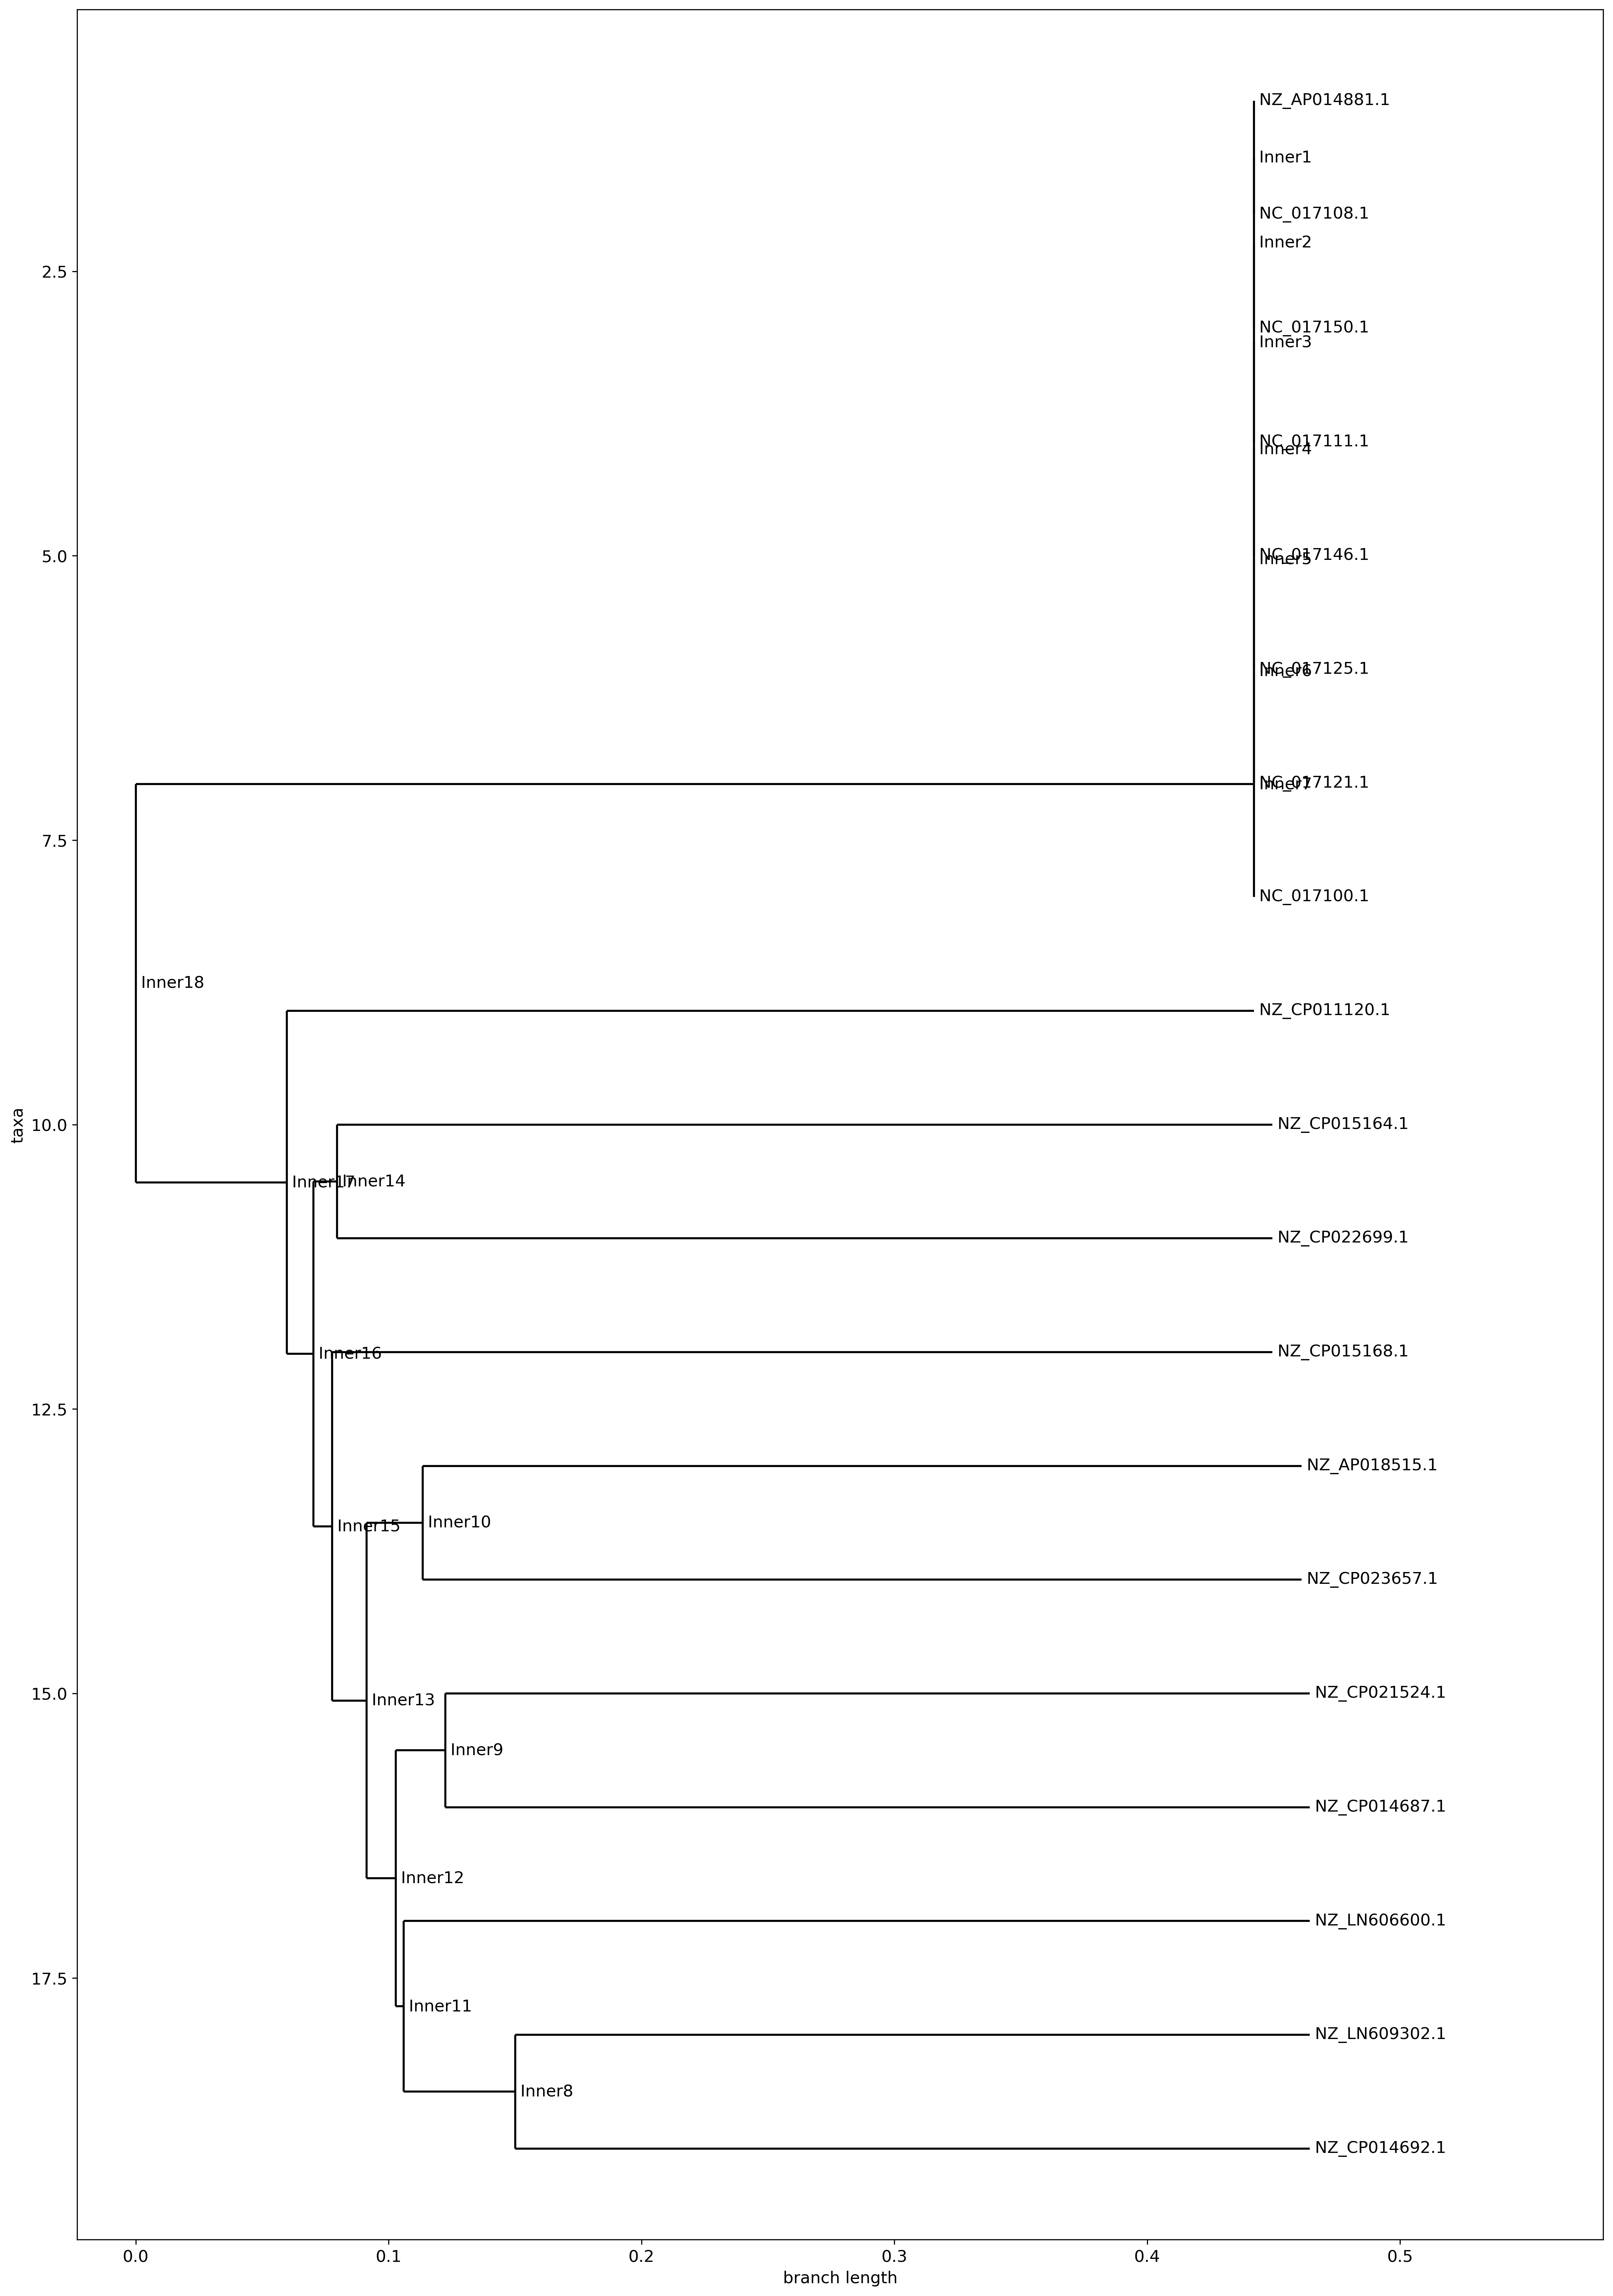

In [17]:
for gene_sequence in os.listdir("./runtime/gene_sequences/"):
    inputFile = "./runtime/gene_sequences/" + gene_sequence
    outputFile = "./runtime/padded_gene_sequences/" + gene_sequence

    records = SeqIO.parse(inputFile, 'fasta')
    records = list(records)
    maxLength = max(len(record.seq) for record in records)

    #Padding sequence to have same length
    for record in records:
        if len(record.seq) != maxLength:
            sequence = str(record.seq).ljust(maxLength, '.')
            record.seq = Seq.Seq(sequence)

    with open(outputFile, 'w') as file:
        SeqIO.write(records, file, 'fasta')
    
    #Get the Aligned sequence
    alignment = AlignIO.read(outputFile, "fasta")
    
    #DNA calculator with ‘identity’ model:
    distanceCalculator = DistanceCalculator('identity')
    distanceMatrix = distanceCalculator.get_distance(alignment)
  
    #Build a UPGMA Tree      
    distanceTreeConstructor = DistanceTreeConstructor()
    phyloGenTree = distanceTreeConstructor.upgma(distanceMatrix)

    # Draw the phylogenetic tree
    Phylo.draw(phyloGenTree)

    #Pylogenetic Tree
    printSpecialText(gene_sequence)
    
    plotTree(phyloGenTree, './outputs/treeGraphical/{}_tree.png'.format(gene_sequence))
    
    Phylo.write([phyloGenTree], './outputs/phyloGeneTrees/{}_tree.nex'.format(gene_sequence), 'nexus')
    

In [18]:
printSpecialText("Robinson Foulds Distances between Trees")

for firstTree in os.listdir('./outputs/phyloGeneTrees/'):
        
    for secondTree in os.listdir('./outputs/phyloGeneTrees/'):
        if firstTree >= secondTree:
            continue

        else:

            taxonNamespace = dendropy.TaxonNamespace()

            treeA = dendropy.Tree.get_from_path('./outputs/phyloGeneTrees/{}'.format(firstTree),'nexus',taxon_namespace=taxonNamespace,)
            treeB = dendropy.Tree.get_from_path('./outputs/phyloGeneTrees/{}'.format(secondTree),"nexus",taxon_namespace=taxonNamespace)

            treeA.encode_bipartitions()
            treeB.encode_bipartitions()

            distance = round(dendropy.calculate.treecompare.weighted_robinson_foulds_distance(treeA, treeB), 4)
            print( firstTree + " <-> ",secondTree +  " = " + str(distance), "\n")
            



========================================| Robinson Foulds Distances between Trees |========================================
alpha-beta_hydrolase.fasta_tree.nex <->  efflux_transporter_outer_membrane_subunit.fasta_tree.nex = 4.3757 

alpha-beta_hydrolase.fasta_tree.nex <->  helix-turn-helix_domain-containing_protein.fasta_tree.nex = 3.1256 

efflux_transporter_outer_membrane_subunit.fasta_tree.nex <->  helix-turn-helix_domain-containing_protein.fasta_tree.nex = 2.7816 

LysR_family_transcriptional_regulator.fasta_tree.nex <->  alpha-beta_hydrolase.fasta_tree.nex = 4.6156 

LysR_family_transcriptional_regulator.fasta_tree.nex <->  efflux_transporter_outer_membrane_subunit.fasta_tree.nex = 2.248 

LysR_family_transcriptional_regulator.fasta_tree.nex <->  helix-turn-helix_domain-containing_protein.fasta_tree.nex = 3.7764 

